In [6]:
import os
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

A {
  "img_size": 28,
  "encoding_size": 150,
  "ae_type": "ff",
  "ae_hidden_sizes": [
    200,
    100,
    50
  ],
  "ra_type": "ff",
  "ra_hidden_size": 200,
  "ra_num_layers": 1,
  "ra_nonlinearity": "relu",
  "ra_network_type": "vanilla",
  "clf_type": "pw",
  "clf_hidden_sizes": [
    80
  ],
  "clf_nonlinearity": "relu",
  "learning_rate": 0.1,
  "momentum": 0.1,
  "weight_decay": 0,
  "num_epochs": 80,
  "epoch_patience": 12,
  "batch_size": 8,
  "time_sec": 16.78275728225708,
  "best_val_loss": 0.03124768961043585,
  "best_acc": 0.5476190476190477,
  "best_epoch": 22,
  "epochs_tained_for": 36
}
B {
  "img_size": 28,
  "encoding_size": 20,
  "ae_type": "ff",
  "ae_hidden_sizes": [
    500,
    200
  ],
  "ra_type": "ff",
  "ra_hidden_size": 50,
  "ra_num_layers": 3,
  "ra_nonlinearity": "relu",
  "ra_network_type": "vanilla",
  "clf_type": "pw",
  "clf_hidden_sizes": [
    100,
    50,
    10
  ],
  "clf_nonlinearity": "relu",
  "learning_rate": 0.1,
  "momentum": 0.5,
  "wei

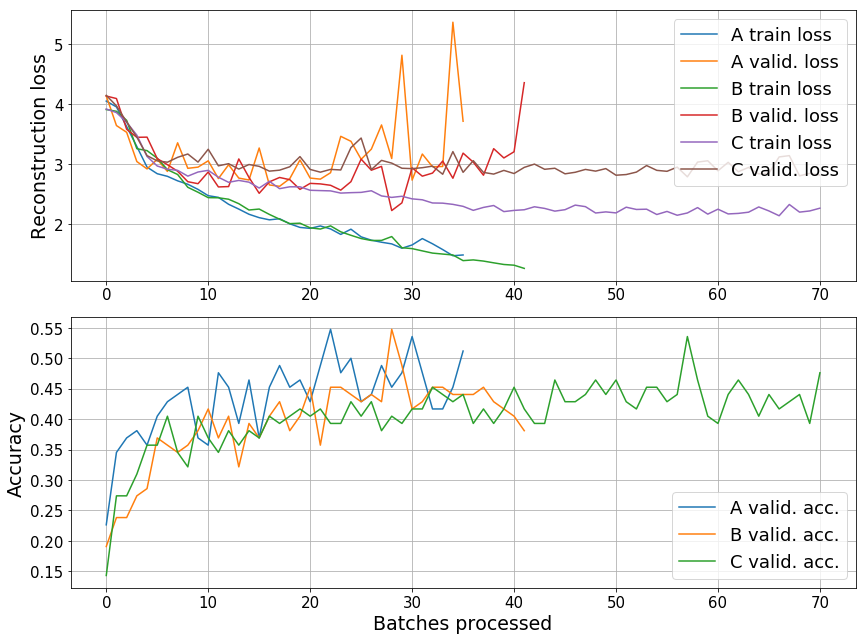

In [16]:
# Folders: indices
which_models = {'exp/01_e2e/res': [1518, 2059, 210]}

tick_size = 15
title_size = 20
legend_size = 18
axis_label_size = 19
marker_size = 10

fig, axs = plt.subplots(2,1, figsize=(12,9))

counter = 0
for folder in which_models:
    for idx in which_models[folder]:
        with open(os.path.join(folder, f'{idx}.json')) as fp:
            x = json.load(fp)
            train = x['losses']['train_loss']
            val = x['losses']['val_loss']
            acc = x['losses']['val_acc']
            batch_size = x['batch_size']
        # Adjust incorrect normalization in train_test
        train = [x * batch_size * 672 / (672 - 672 % batch_size) for x in train]
        val = [x * 84 for x in val]
        
        del x['losses']
        label = chr(ord('A') + counter)
        print(label, json.dumps(x,indent = 2))
        axs[0].plot(train, label=f'{label} train loss')
        axs[0].plot(val, label=f'{label} valid. loss')
        axs[1].plot(acc, label=f'{label} valid. acc.')
        counter += 1
    
axs[0].set_ylabel('Reconstruction loss', fontsize=axis_label_size)
axs[1].set_ylabel('Accuracy', fontsize=axis_label_size)

axs[1].set_xlabel('Batches processed', fontsize=axis_label_size)
        
for ax in axs:
    ax.grid()
    ax.legend(fontsize=legend_size)
    ax.tick_params(axis='both', labelsize=tick_size)

plt.tight_layout()